In [43]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import plotly.express as px

In [44]:
# Read CSV file
complete_data = pd.read_csv('HR-Employee-Attrition.csv', low_memory=False)
complete_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [45]:
# Check for data types
complete_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [46]:
# Check for the number of the values (to see if we have missing value)
complete_data.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [47]:
# Dropping unwanted columns
cleaned_data = complete_data.drop(columns=['BusinessTravel', 'EmployeeCount', 'DistanceFromHome',
                                             'Attrition','Over18', 'StockOptionLevel', 'StandardHours'])
# Assign EmployeeNumber as an index
cleaned_data.set_index('EmployeeNumber', inplace=True)

cleaned_data.head()

,Age,DailyRate,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1102,Sales,2,Life Sciences,2,Female,94,3,2,...,11,3,1,8,0,1,6,4,0,5
2,49,279,Research & Development,1,Life Sciences,3,Male,61,2,2,...,23,4,4,10,3,3,10,7,1,7
4,37,1373,Research & Development,2,Other,4,Male,92,2,1,...,15,3,2,7,3,3,0,0,0,0
5,33,1392,Research & Development,4,Life Sciences,4,Female,56,3,1,...,11,3,3,8,3,3,8,7,3,0
7,27,591,Research & Development,1,Medical,1,Male,40,3,1,...,12,3,4,6,3,3,2,2,2,2


In [48]:
# selecting numeric columns to crate a summary statistic table
numeric_cols = cleaned_data.select_dtypes(include=['number']).columns
# Getting the mean, median, var, std, sem for each column
summary_table = cleaned_data[numeric_cols].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table

,Age,DailyRate,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,36.923810,802.485714,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6.502931e+03,1.431310e+04,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
median,36.000000,802.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4.919000e+03,1.423550e+04,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
var,83.455049,162819.593737,1.048914,1.194829,413.285626,0.506319,1.225316,1.216270,2.216486e+07,5.066288e+07,...,13.395144,0.130194,1.169013,60.540563,1.662219,0.499108,37.534310,13.127122,10.384057,12.731595
std,9.135373,403.509100,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4.707957e+03,7.117786e+03,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
sem,0.238269,10.524335,0.026712,0.028510,0.530233,0.018559,0.028871,0.028764,1.227931e+02,1.856463e+02,...,0.095459,0.009411,0.028200,0.202939,0.033627,0.018426,0.159792,0.094499,0.084048,0.093064


In [49]:
cleaned_data['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [50]:
cleaned_data['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [51]:
job_satisfaction = cleaned_data[['JobRole', 'JobSatisfaction']]

In [52]:
final_df= job_satisfaction.groupby('JobRole')['JobSatisfaction'].value_counts()
final_df

JobRole                    JobSatisfaction
Healthcare Representative  4                   43
                           3                   43
                           1                   26
                           2                   19
Human Resources            2                   16
                           4                   13
                           3                   13
                           1                   10
Laboratory Technician      4                   80
                           3                   75
                           1                   56
                           2                   48
Manager                    4                   33
                           3                   27
                           2                   21
                           1                   21
Manufacturing Director     3                   49
                           4                   38
                           2                   32
       

In [53]:
final_df=pd.DataFrame(final_df).reset_index()
final_df

,JobRole,JobSatisfaction,count
0,Healthcare Representative,4,43
1,Healthcare Representative,3,43
2,Healthcare Representative,1,26
3,Healthcare Representative,2,19
4,Human Resources,2,16
5,Human Resources,4,13
6,Human Resources,3,13
7,Human Resources,1,10
8,Laboratory Technician,4,80
9,Laboratory Technician,3,75


In [54]:
final_df.loc[:,'JobRole'].unique()

array(['Healthcare Representative', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative'], dtype=object)

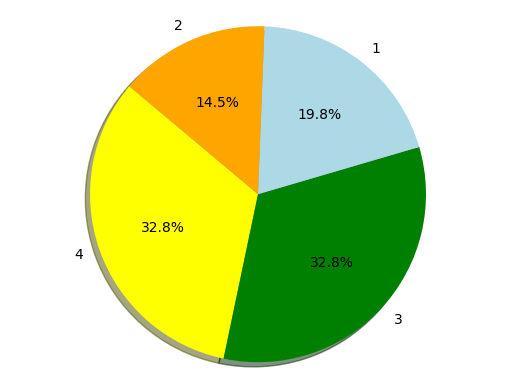

In [55]:
#Individual Job role test
hc_df_js=final_df[final_df['JobRole'] == 'Healthcare Representative']['JobSatisfaction']
hc_df_count=final_df[final_df['JobRole'] == 'Healthcare Representative']['count']
colors = ["yellow","green","lightblue","orange"]
plt.pie(hc_df_count, labels=hc_df_js, colors=colors,
        autopct="%1.1f%%",shadow=True, startangle=140)
plt.axis("equal")
plt.show()

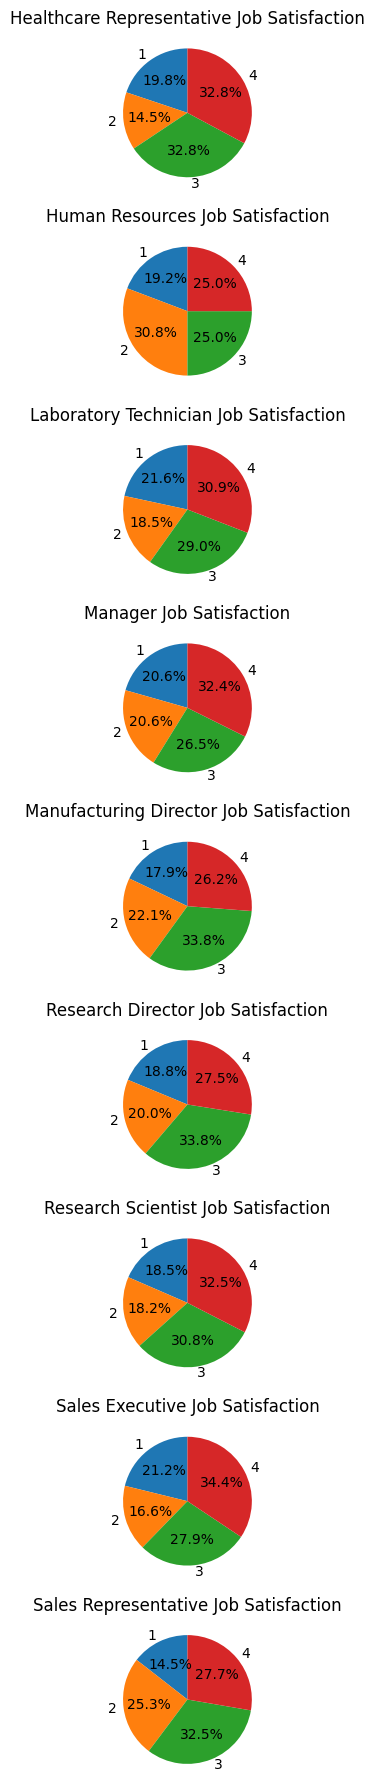

In [56]:
# Grouping by JobRole and JobSatisfaction and aggregating counts
grouped = final_df.groupby(['JobRole', 'JobSatisfaction'])['count'].sum().reset_index()

# Unique job roles
job_roles = final_df['JobRole'].unique()

# Plotting pie charts for each job role
fig, axes = plt.subplots(nrows=len(job_roles), figsize=(8, 2*len(job_roles)))

for i, job_role in enumerate(job_roles):
    ax = axes[i]
    job_data = grouped[grouped['JobRole'] == job_role]
    ax.pie(job_data['count'], labels=job_data['JobSatisfaction'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{job_role} Job Satisfaction')

plt.tight_layout()
plt.show()

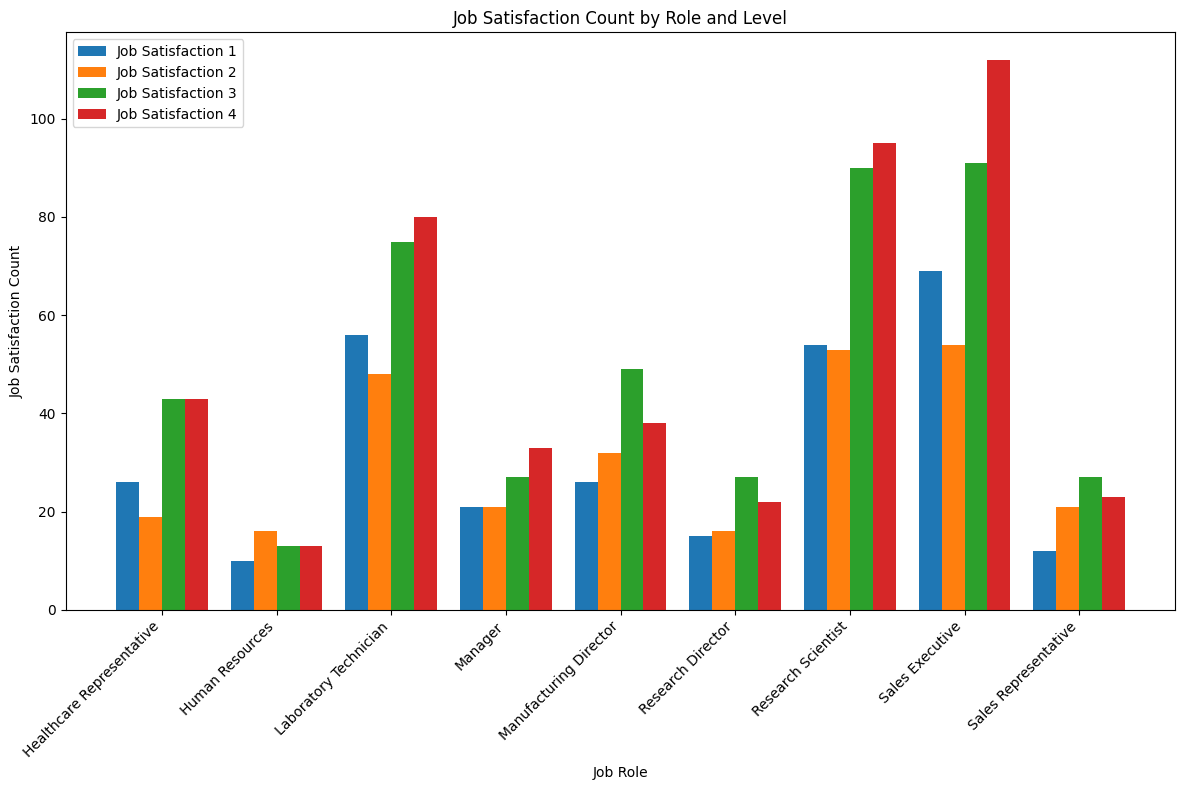

In [57]:
final_df=pd.DataFrame(final_df).reset_index()
# Prepare data for plotting
job_roles1 = final_df.loc[:,'JobRole'].unique()
job_satisfaction_levels = sorted(final_df['JobSatisfaction'].unique())

bar_width = 0.2
index = np.arange(len(job_roles1))

# Plot
plt.figure(figsize=(12, 8))

for i, satisfaction_level in enumerate(job_satisfaction_levels):
    count_values = final_df[final_df['JobSatisfaction'] == satisfaction_level]['count']
    plt.bar(index + i * bar_width, count_values, bar_width, label=f'Job Satisfaction {satisfaction_level}')
    #for j, count in enumerate(count_values):
     #   plt.text(index[j] + i * bar_width, count , str(count), ha='center', va='bottom')

plt.xlabel('Job Role')
plt.ylabel('Job Satisfaction Count')
plt.title('Job Satisfaction Count by Role and Level')
plt.xticks(index + bar_width * (len(job_satisfaction_levels) - 1) / 2, job_roles1, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [116]:
xaxis= job_satisfaction.groupby('JobRole')['JobSatisfaction'].value_counts()

combined_df=pd.DataFrame(xaxis).reset_index()
combined_df=combined_df.sort_values(by="JobSatisfaction").groupby('JobRole').head()
fig = px.bar(combined_df, x='JobRole', y='count', color='JobSatisfaction', width=900, height=600,
              title='Job Satisfaction Count by Role and Level',  color_continuous_scale=px.colors.sequential.Rainbow,
               labels={'count': 'Job Satisfaction Count', 'JobRole': 'Job Role', 'JobSatisfaction': 'Job Satisfaction Level'})
#fig.update_traces(texttemplate='%{y}', textposition='inside')
fig.show()

In [103]:
#combined_df.sresult = combined_df.sort_values(by='Chemistry')
combined_df

True

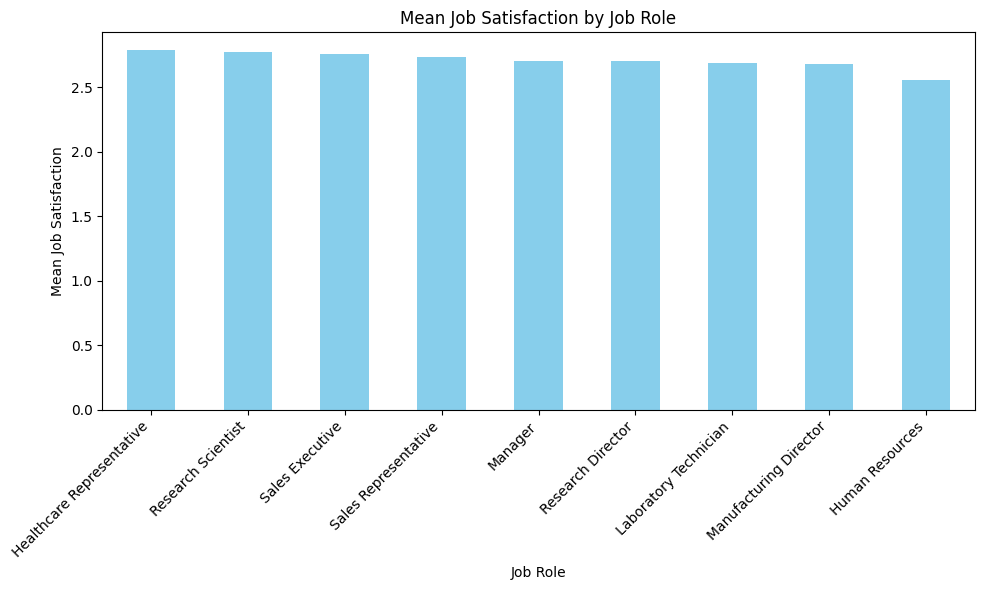

                           count      mean       std  min  25%  50%   75%  max
JobRole                                                                       
Healthcare Representative  131.0  2.786260  1.109453  1.0  2.0  3.0  4.00  4.0
Human Resources             52.0  2.557692  1.073997  1.0  2.0  2.5  3.25  4.0
Laboratory Technician      259.0  2.691120  1.126306  1.0  2.0  3.0  4.00  4.0
Manager                    102.0  2.705882  1.130918  1.0  2.0  3.0  4.00  4.0
Manufacturing Director     145.0  2.682759  1.052137  1.0  2.0  3.0  4.00  4.0
Research Director           80.0  2.700000  1.072085  1.0  2.0  3.0  4.00  4.0
Research Scientist         292.0  2.773973  1.095260  1.0  2.0  3.0  4.00  4.0
Sales Executive            326.0  2.754601  1.139997  1.0  2.0  3.0  4.00  4.0
Sales Representative        83.0  2.734940  1.025104  1.0  2.0  3.0  4.00  4.0


In [59]:
mean_satisfaction_by_role = job_satisfaction.groupby('JobRole')['JobSatisfaction'].mean()

# Sorting data by mean satisfaction
mean_satisfaction_by_role = mean_satisfaction_by_role.sort_values(ascending=False)

# Creating the bar plot
plt.figure(figsize=(10, 6))
mean_satisfaction_by_role.plot(kind='bar', color='skyblue')
plt.title('Mean Job Satisfaction by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Mean Job Satisfaction')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()
summary_statistics = job_satisfaction.groupby('JobRole')['JobSatisfaction'].describe()
print(summary_statistics)

<Figure size 1000x600 with 0 Axes>

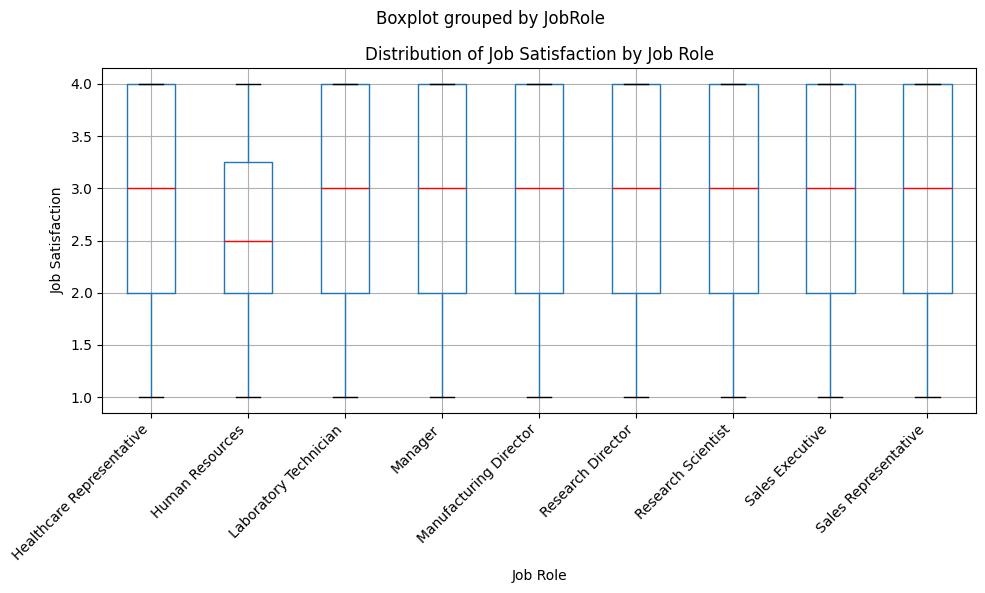

                           count      mean       std  min  25%  50%   75%  max
JobRole                                                                       
Healthcare Representative  131.0  2.786260  1.109453  1.0  2.0  3.0  4.00  4.0
Human Resources             52.0  2.557692  1.073997  1.0  2.0  2.5  3.25  4.0
Laboratory Technician      259.0  2.691120  1.126306  1.0  2.0  3.0  4.00  4.0
Manager                    102.0  2.705882  1.130918  1.0  2.0  3.0  4.00  4.0
Manufacturing Director     145.0  2.682759  1.052137  1.0  2.0  3.0  4.00  4.0
Research Director           80.0  2.700000  1.072085  1.0  2.0  3.0  4.00  4.0
Research Scientist         292.0  2.773973  1.095260  1.0  2.0  3.0  4.00  4.0
Sales Executive            326.0  2.754601  1.139997  1.0  2.0  3.0  4.00  4.0
Sales Representative        83.0  2.734940  1.025104  1.0  2.0  3.0  4.00  4.0


In [60]:
plt.figure(figsize=(10, 6))
job_satisfaction.boxplot(by='JobRole', column='JobSatisfaction', figsize=(10, 6),medianprops=dict(color="red", alpha=1))
plt.title('Distribution of Job Satisfaction by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Job Satisfaction')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Additionally, you can calculate summary statistics such as median, standard deviation, etc.
summary_statistics = job_satisfaction.groupby('JobRole')['JobSatisfaction'].describe()
print(summary_statistics)

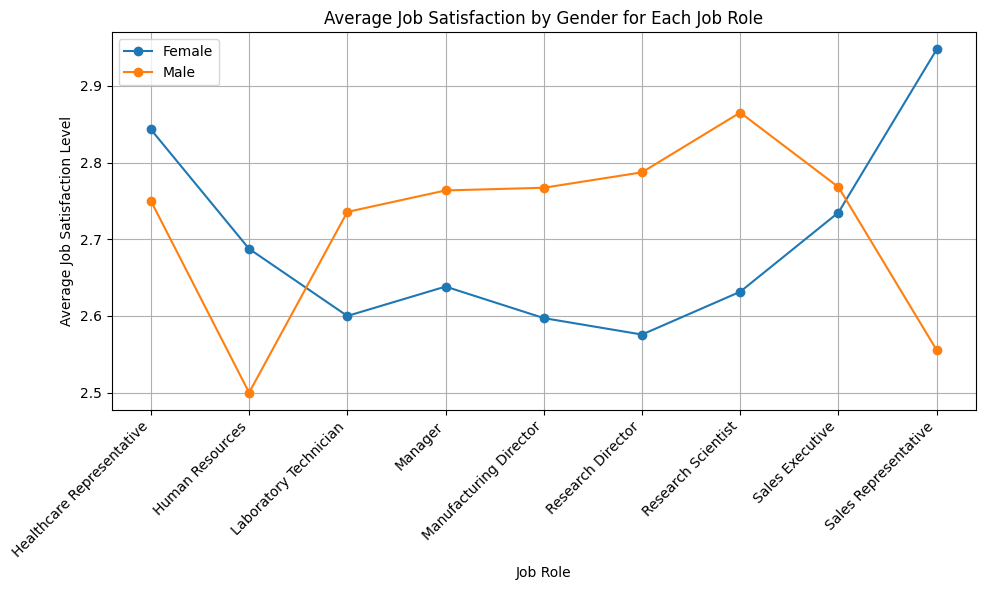

In [61]:
# Calculate the average job satisfaction level for each gender within each job role
avg_satisfaction = cleaned_data.groupby(['JobRole', 'Gender'])['JobSatisfaction'].mean().reset_index()

# Pivot the data to have job roles as rows and genders as columns
pivot_table = avg_satisfaction.pivot(index='JobRole', columns='Gender', values='JobSatisfaction')

# Plotting
plt.figure(figsize=(10, 6))
for gender in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[gender], marker='o', label=gender)
plt.title('Average Job Satisfaction by Gender for Each Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Job Satisfaction Level')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
